Photos and videos are result of our camera recording light. Humans have an ultimate sensor called EYES, that's why the light is the most important aspect and it defines the look they feel the quality of photos and videos. The race this light emits are scattered across objects and reflected by other objects. Each ray from this light source gets bounced billions of times before it gets to the camera sensor. This is why real life looks so good! Good models, textures, materials, eternal variety of elements and enormous amount of light bounces, captured by our eyes or camera. But computers have limits of what they can calculate… In real life eyes are capturing uncountable amount of data non-stop! Computers are far away from that kind of processing power and clever people came up with the different rendering methods. In this project we will talk about one of the most exciting rendering methods, called __Ray tracing__.

### Points in 3D space ###
..................................

<IPython.core.display.Javascript object>


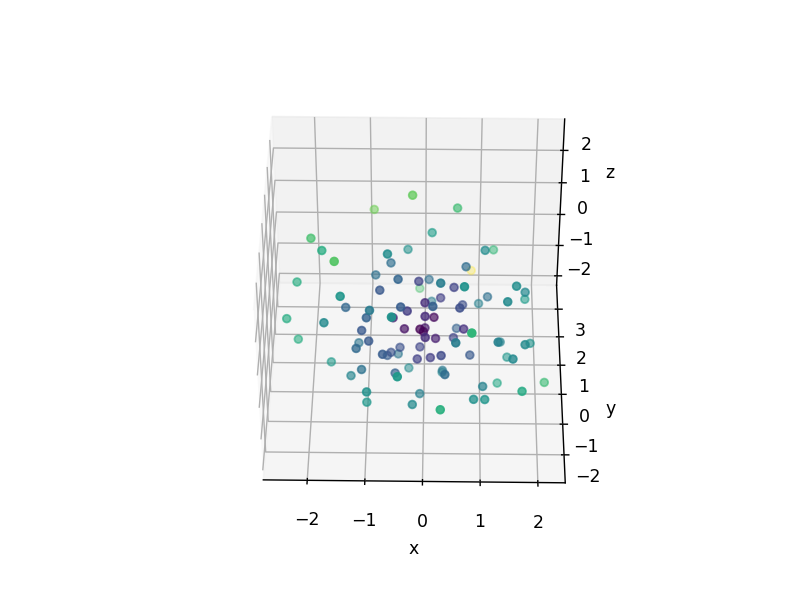

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D #Enabling 3D projections

%matplotlib notebook 
#We can click and drag our 3d projection

x = np.random.normal(size=100)
y = np.random.normal(size=100)
z = np.random.normal(size=100)


fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x,y,z,c=np.linalg.norm([x,y,z],axis=0))

ax.set(xlabel='x', ylabel='y', zlabel='z')
plt.show()

### Vectors in 3D space ###
A 3D vector is a line segment in three-dimensional space running from point **A (tail)** to point **B (head)**. Each vector has a magnitude (or length) and direction. When we are working in a 3 dimension space, we always consider all three coordinate bases which are the x-axis, y-axis, and z-axis. For example, we have two points in the 3 dimension space and they are point $A(x_{1}, y_{1}, z_{1})$ and point $B(x_{1}, y_{1}, z_{1})$. The coordinate of point A and B will be written:




\begin{equation}\ \vec{AB} = x_{1} + x_{2}, y_{1} + y_{2}, z_{1} + z_{2} \end{equation}



<IPython.core.display.Javascript object>


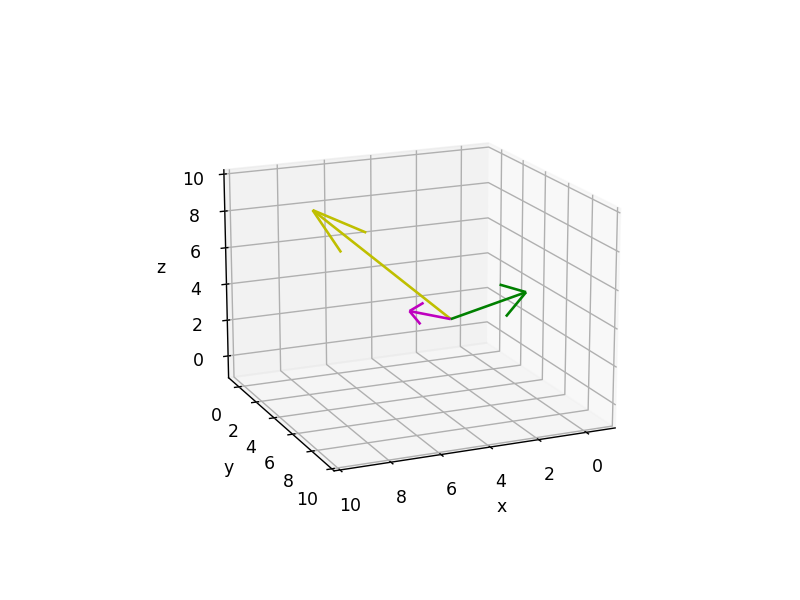

In [12]:
B = [4, 5, 3]
C = [6, 0, 7]
D = [1, 9, 5]

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set_xlim([-1,10])
ax.set_ylim([-1,10])
ax.set_zlim([-1,10])

A = [1,0,1]
ax.quiver(A[0], A[1],A[2], B[0], B[1], B[2], color = "m") 
ax.quiver(A[0], A[1],A[2], C[0], C[1], C[2], color = "y")
ax.quiver(A[0], A[1],A[2], D[0], D[1], D[2], color = "g")
ax.view_init(10,10)

ax.set(xlabel='x', ylabel='y', zlabel='z')
plt.show()

### Magnitude ###
A vector's magnitude is its most important component, and a vector without it is just a direction with no strength. The length of the line segment that defines a vector is its magnitude. A vector's magnitude is always expressed as a positive number, with the exception of the zero vector. It's called the absolute value of $||V||$ =  magnitude(v). Pythagoras' theorem showed us how to compute this:

\begin{equation}\ ||V|| = \sqrt{V^{2}_{x} + V^{2}_{y} + V^{2}_{z}}\end{equation}


In [37]:
v = np.array([5,-5,3])

magnitude = np.linalg.norm(v)
print(magnitude)

7.681145747868608


### Normalization ###

Vectors exist in a variety of shapes and sizes, but how can we classify them? Using the unit vector as a guide. The unit vector has a simple definition: it is a vector with a magnitude of one. This indicates that a unit vector is any vector with a magnitude of one, regardless of direction. Normalization is the process of converting an arbitrary vector into a unit vector. It's called V hat - $\hat{V}$ = normalize(v). To normalize a vector, we need to divide the components of that vector by the magnitude of the vector.  


\begin{equation}\ \hat{V} = \frac{V}{||V||}\end{equation}

In [38]:
normalize = [number/magnitude for number in v]
print(normalize)

[0.6509445549041194, -0.6509445549041194, 0.39056673294247163]


_So our new array magically turned into unit vector:_

In [74]:
vector_length = np.linalg.norm(normalize)
print(vector_length)

1.0


### Dot product ###

The Python dot product is also known as a scalar product in algebraic operation which takes two equal-length sequences and returns a single number. When we working with vectors, we'll encounter a dot product when crossing rays with objects and when computing shading on a surface. The smaller the dot product, the greater the angle between the vectors. A dot product of 1 indicates that two unit vectors are identical, while a dot product of -1 indicates that they point in opposing directions. More specifically, if the two vectors are unit vectors, the dot product is the angle's cosine between them.

\begin{equation}\ V_{1} \cdot V_{2} = {x_{1}x_{2} + y_{1} y_{2} + z_{1} z_{2}}\end{equation}

In [73]:
M = np.array([-7, 0, 3])
N = np.array([2, 4, -5])
dot_product = np.dot(M, N)
print(dot_product)

-29


### Cross Product ###
The cross product is a vector operation that, unlike the dot product, outputs another vector rather than a scalar, as shown in the following test. Add it to your collection now.
If we take the cross product of X and Y, we get Z. Similarly, Y cross Z gets X, and Z cross X is Y. The results are always perpendicular to the inputs. Order is important here. X cross Y gives you Z, but Y cross X gives you -Z!

\begin{equation}\ V_{1}, V_{2} = {x_{1} - x_{2}, y_{1} - y_{2} , z_{1} - z_{2}}\end{equation}
\begin{equation}\ V_{2}, V_{1} = {x_{2} - x_{1}, y_{2} - y_{1} , z_{2} - z_{1}}\end{equation}

In [72]:
cross_product = np.cross(M, N)
cross_opposite = np.cross(N, M)
print(cross_product)
print(cross_opposite)

[-12 -29 -28]
[12 29 28]


### Multiplication of a vector by a number (scalar) ###

When a vector is multiplied by a positive number (for example 2), only the magnitude is modified; the direction stays unchanged.

When a vector is multiplied by a negative number (for example -2), not only is the magnitude changed, but also the direction.

\begin{equation}\ 2V = 2x, 2y , 2z \end{equation}

\begin{equation}\ -2V = -2x, -2y , -2z \end{equation}

<IPython.core.display.Javascript object>


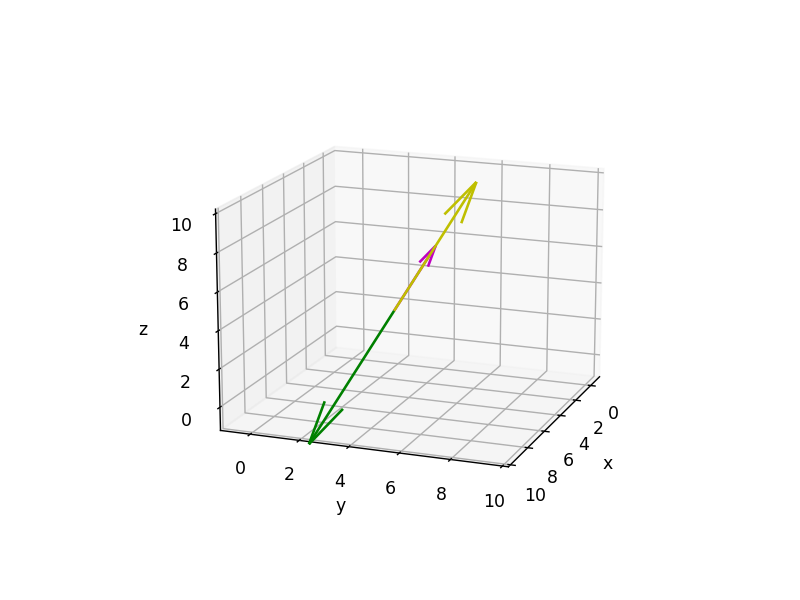

In [11]:
E = np.array([-2,1,3])
F = E * 2
G = E * -2

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set_xlim([-1,10])
ax.set_ylim([-1,10])
ax.set_zlim([-1,10])

A = [3,3,3]
ax.quiver(A[0], A[1],A[2], E[0], E[1], E[2], color = "m") 
ax.quiver(A[0], A[1],A[2], F[0], F[1], F[2], color = "y")
ax.quiver(A[0], A[1],A[2], G[0], G[1], G[2], color = "g")
ax.view_init(10,10)

ax.set(xlabel='x', ylabel='y', zlabel='z')
plt.show()

### Division of a vector by a number (scalar) ###

When a vector is divided by a scalar number, the vector is multiplied by the reciprocal of the number, resulting in a new vector.

\begin{equation}\ \frac{V}{2} = \frac{x}{2}, \frac{y}{2} , \frac{z}{ 2}\end{equation}

\begin{equation}\ - \frac{V}{2} = - \frac{x}{2}, - \frac{y}{2} , - \frac{z}{ 2}\end{equation}

<IPython.core.display.Javascript object>


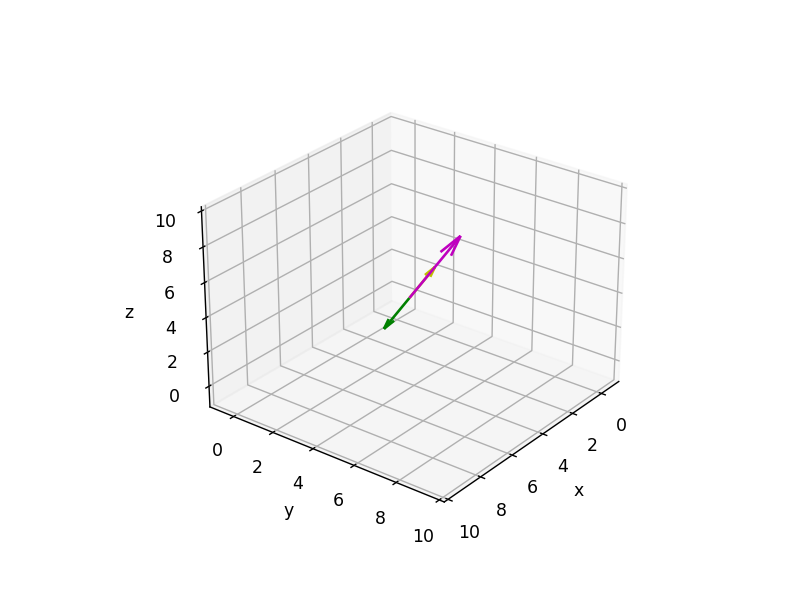

In [10]:
H = E / 2
I = E / -2

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set_xlim([-1,10])
ax.set_ylim([-1,10])
ax.set_zlim([-1,10])

ax.quiver(A[0], A[1],A[2], E[0], E[1], E[2], color = "m") 
ax.quiver(A[0], A[1],A[2], H[0], H[1], H[2], color = "y")
ax.quiver(A[0], A[1],A[2], I[0], I[1], I[2], color = "g")
ax.view_init(10,10)

ax.set(xlabel='x', ylabel='y', zlabel='z')
plt.show()

### Pixel ### 
Image looks like a very complex piece of math? No, it’s actually super simple! Let's begin with a brief introduction to the pixel, the most fundamental building component of digital images. A pixel is the smallest controllable element of an image. If we take an image and we zoom in we'll eventually end up seeing all these tiny squares and if we keep zooming in the squares will grow larger but they'll never split into any more squares that's because we're looking at the smallest unit of the image. 
Computers in general will always prefer binary system. Let's see what 1 and 0 mean in our case. In a binary image zero stands for black and one stands for white, which is also equivalent to false and true. In the background we see beautiful data structure which we call a matrix. But what happens if our image contains more than just two colors? And we can no longer describe it in a binary form?

In this case the best color format to describe this image would be grayscale. The __Grayscale__ format is using numbers anywhere from 0 to 255 to describe the intensity of colors. Once again 0 is black and 255 is white. Grayscale images have many shades of gray in between. But this give as only measuring the intensity of one particular shade. What happens when we need to measure the intensity of colors across several shades?


### RGB ### 

We can use RGB format to describe a colorful image. RGB stands for __Red__, __Green__, and __Blue__. it measures the intensity of each of these colors on a particular pixel. We are also using values from 0 to 255. The only difference is we'll be checking across three different color channels, not just one. When you mix those three hues in different proportions, you get just much any other color you can think of, from red, yellow, and green to cyan, blue, and purple, and anything in between. A color, like vectors and points, is a tuple! A (red, green, blue) tuple can be used to make any color.

   | Index | 0  |  1  |  2  | 
|---:|:-------------|:-----------|:------|
| 0 | (<font color='red'>R</font>, <font color='green'>G</font>, <font color='blue'>B</font>)  | (<font color='red'>R</font>, <font color='green'>G</font>, <font color='blue'>B</font>)       | (<font color='red'>R</font>, <font color='green'>G</font>, <font color='blue'>B</font>)   | 
| 1 | (<font color='red'>R</font>, <font color='green'>G</font>, <font color='blue'>B</font>)  | (<font color='red'>R</font>, <font color='green'>G</font>, <font color='blue'>B</font>)   | (<font color='red'>R</font>, <font color='green'>G</font>, <font color='blue'>B</font>)   |

<IPython.core.display.Javascript object>


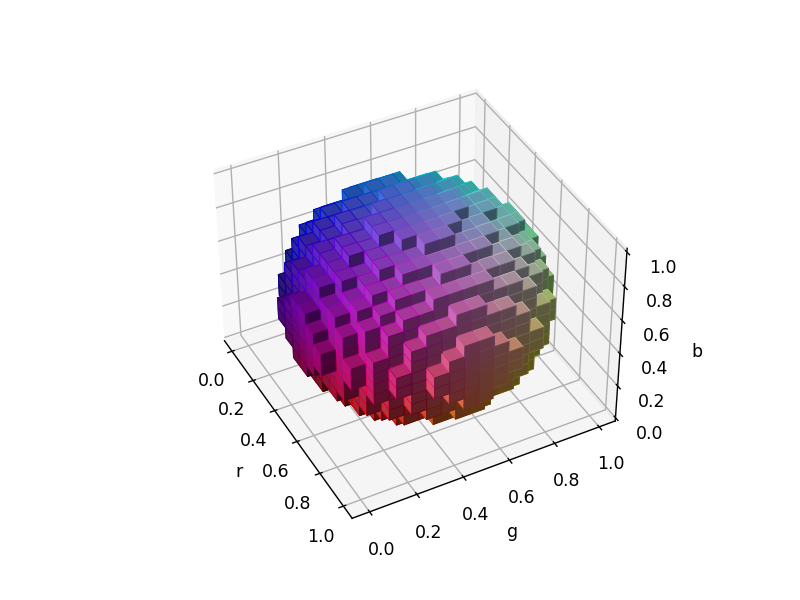

In [15]:
def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5)**2 + (gc - 0.5)**2 + (bc - 0.5)**2 < 0.5**2

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)

ax.set(xlabel='r', ylabel='g', zlabel='b')
plt.show()

### Canvas ### 

A canvas is a virtual drawing board that the ray tracer will utilize to convert scenes into visible images. A canvas is nothing more than a rectangular grid of pixels, similar to the one on every computer screen. We'll provide the __height__ and __width__ of our canvas in the code below. Our image is made up of __pixels__ that will be stored in a matrix. Each pixel will be represented as a tuple with (R, G, B) colors.

### Ray-Sphere Intersections ###

Ray casting is the process of creating a ray, or line, and finding the intersections of that ray with the objects in a scene. Each ray have a starting point called the origin O, and a vector called the direction D witch says where it points. Armed with a ray’s origin and direction, we can find points that lie any distance t along the ray. With these 2 vectors, we can represent any point P on the ray like this:


\begin{equation}\ ray(t) = ray_{origin} + ray_{direction} * t \end{equation}

\begin{equation}\ hit_{pos} = ray_{origin} + ray_{direction} * dist \end{equation}

\begin{equation}\ sphere\_to\_ray = ray_{origin} - sphere_{center}  \end{equation}


\begin{equation}\ a = 1 \end{equation}

\begin{equation}\ b = 2ray_{dir} \cdot sphere\_to\_ray \end{equation}

\begin{equation}\ c = sphere\_to\_ray \cdot sphere\_to\_ray - ({sphere_{center}})^2 \end{equation}

\begin{equation}\ \Delta  = b^2 - 4ac \end{equation}

\begin{equation}\ distance = \frac{-b\pm\sqrt{discriminant}}{2a} \end{equation}

Aspect Ratio


Our rendered image is a window to a 3D scene. If we ignore the aspect ratio, it's a pretty big chance our sphere to be squashed or stretched. The reason is aspect ratio was strongly calculated. For example, if the screen view is 640 in width and 256 in height this means the screen is a rectangle in shape. The problem is that our pixels are squares. The problem can be solved with a screen extension:

\begin{equation}\ AspectRatio = \frac{width}{height} \end{equation}

\begin{equation}\ y_{max} = \frac{1}{aspectratio} \end{equation}

\begin{equation}\ y_{min} = - y_{max} \end{equation}





In [4]:
import numpy as np 
import numpy as np 
v1 = np.array([1.0, -2.0, -2.0])
v2 = np.array([3.0, 6.0, 9.0])
print(v1-v2)

[ -2.  -8. -11.]
